# Predictive Maintenance Data Analysis
#### Team 7 : Woohyeon Her, Seokhoon Shin, Jaejoong Kim, Joshua Nahm, Yijun Kim

## Read and Explore Data

In [5]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# New dataset
df = pd.read_csv('/content/drive/My Drive/Colab_Data/created_dataset.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,934,L48113,L,295.5,306.0,1597.0,37.2,16.0,0,No Failure
1,9159,H38572,H,297.4,308.4,1487.0,46.2,150.0,0,No Failure
2,4458,M19317,M,302.5,310.3,1710.0,27.3,186.0,0,No Failure
3,991,L48170,L,296.2,307.0,1414.0,48.3,162.0,0,No Failure
4,1666,H31079,H,298.2,307.9,1491.0,39.7,181.0,0,No Failure


### 1) Drop Features

In [6]:
df = df.drop(columns=['UDI', 'Product ID', 'Failure Type'])  # Drop unnecessary features
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,L,295.5,306.0,1597.0,37.2,16.0,0
1,H,297.4,308.4,1487.0,46.2,150.0,0
2,M,302.5,310.3,1710.0,27.3,186.0,0
3,L,296.2,307.0,1414.0,48.3,162.0,0
4,H,298.2,307.9,1491.0,39.7,181.0,0


### 2) Label Encoding

In [7]:
#Type L, M, H -> product ID label:
#L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number

# Convert the 'Type' column into dummy variables
type_mapping = {'L': 0, 'M': 1, 'H': 2}
df['Type'] = df['Type'].map(type_mapping)

print("\nAfter encoding 'Type' column:")
print(df.head())


After encoding 'Type' column:
   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     0                295.5                    306.0                  1597.0   
1     2                297.4                    308.4                  1487.0   
2     1                302.5                    310.3                  1710.0   
3     0                296.2                    307.0                  1414.0   
4     2                298.2                    307.9                  1491.0   

   Torque [Nm]  Tool wear [min]  Target  
0         37.2             16.0       0  
1         46.2            150.0       0  
2         27.3            186.0       0  
3         48.3            162.0       0  
4         39.7            181.0       0  


In [8]:
df.info() # Data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     50002 non-null  int64  
 1   Air temperature [K]      50002 non-null  float64
 2   Process temperature [K]  50002 non-null  float64
 3   Rotational speed [rpm]   50002 non-null  float64
 4   Torque [Nm]              50002 non-null  float64
 5   Tool wear [min]          50002 non-null  float64
 6   Target                   50002 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 2.7 MB


### 3) Check Missing Values

In [9]:
df.isnull().sum()  # Check for missing values--> result : no missing values

,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0


### 4) Distribution of each features

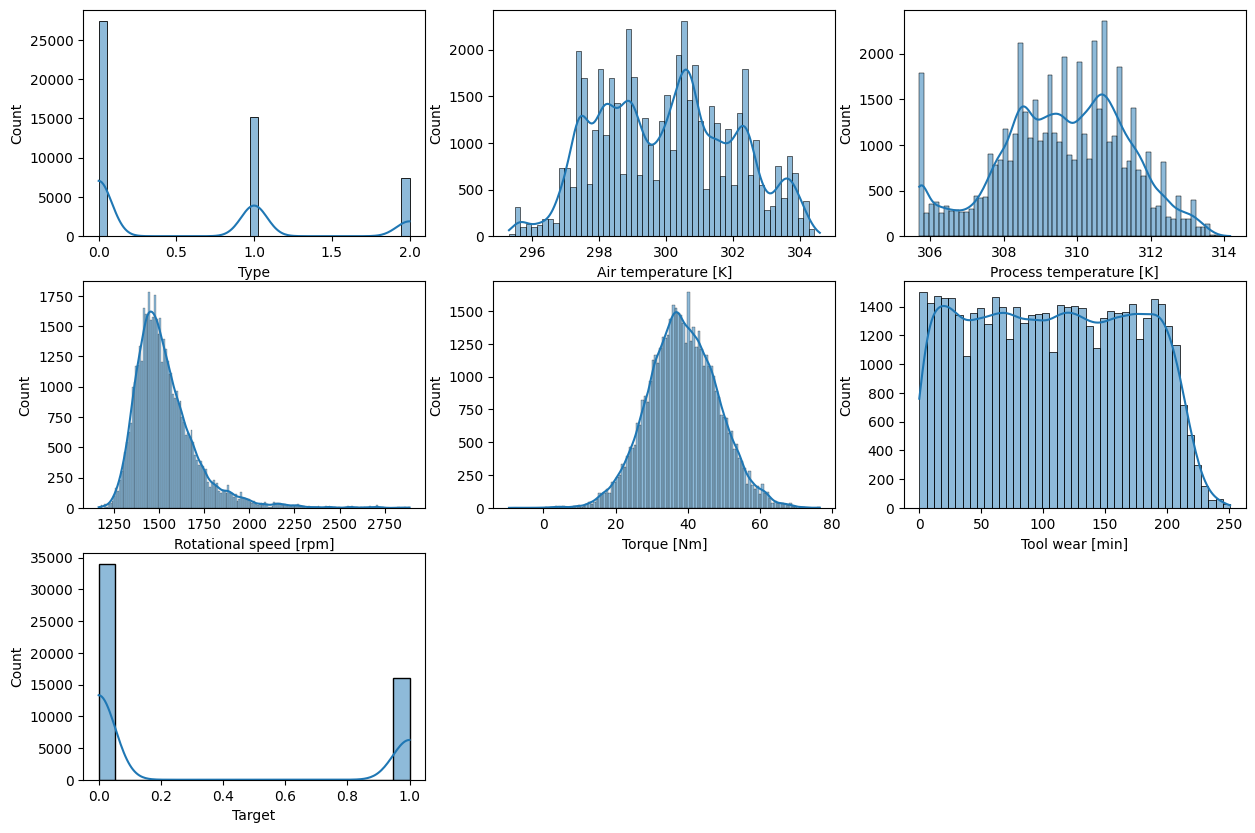

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# To see distribution of each features
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)

In [11]:
distribution = df['Target'].value_counts()

print(distribution)

Target
0    34000
1    16002
Name: count, dtype: int64


### 5) Distribution of 'No Failure' VS 'Failure'

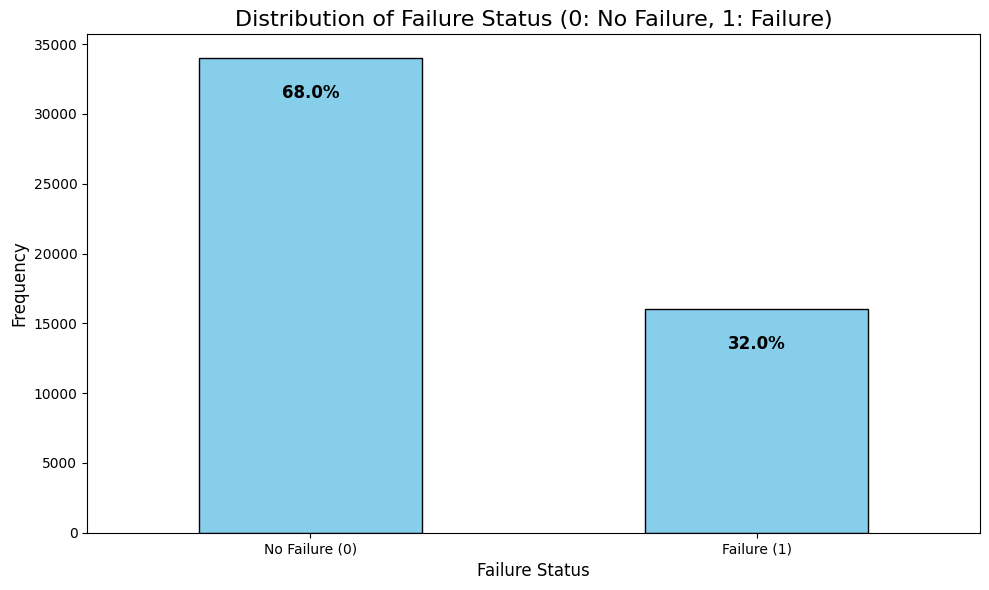

In [12]:
import matplotlib.pyplot as plt

failure_status_counts = df['Target'].value_counts()

plt.figure(figsize=(10, 6))

ax = failure_status_counts.plot(kind='bar', color='skyblue', edgecolor='black')

total = failure_status_counts.sum()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height / total * 100):.1f}%',
                (p.get_x() + p.get_width() / 2., height - 0.05 * total),
                ha='center', va='center', fontsize=12, color='black', fontweight='bold')

plt.title('Distribution of Failure Status (0: No Failure, 1: Failure)', fontsize=16)
plt.xlabel('Failure Status', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks([0, 1], ['No Failure (0)', 'Failure (1)'], rotation=0)
plt.tight_layout()

plt.show()



### 6) Correlation Plot

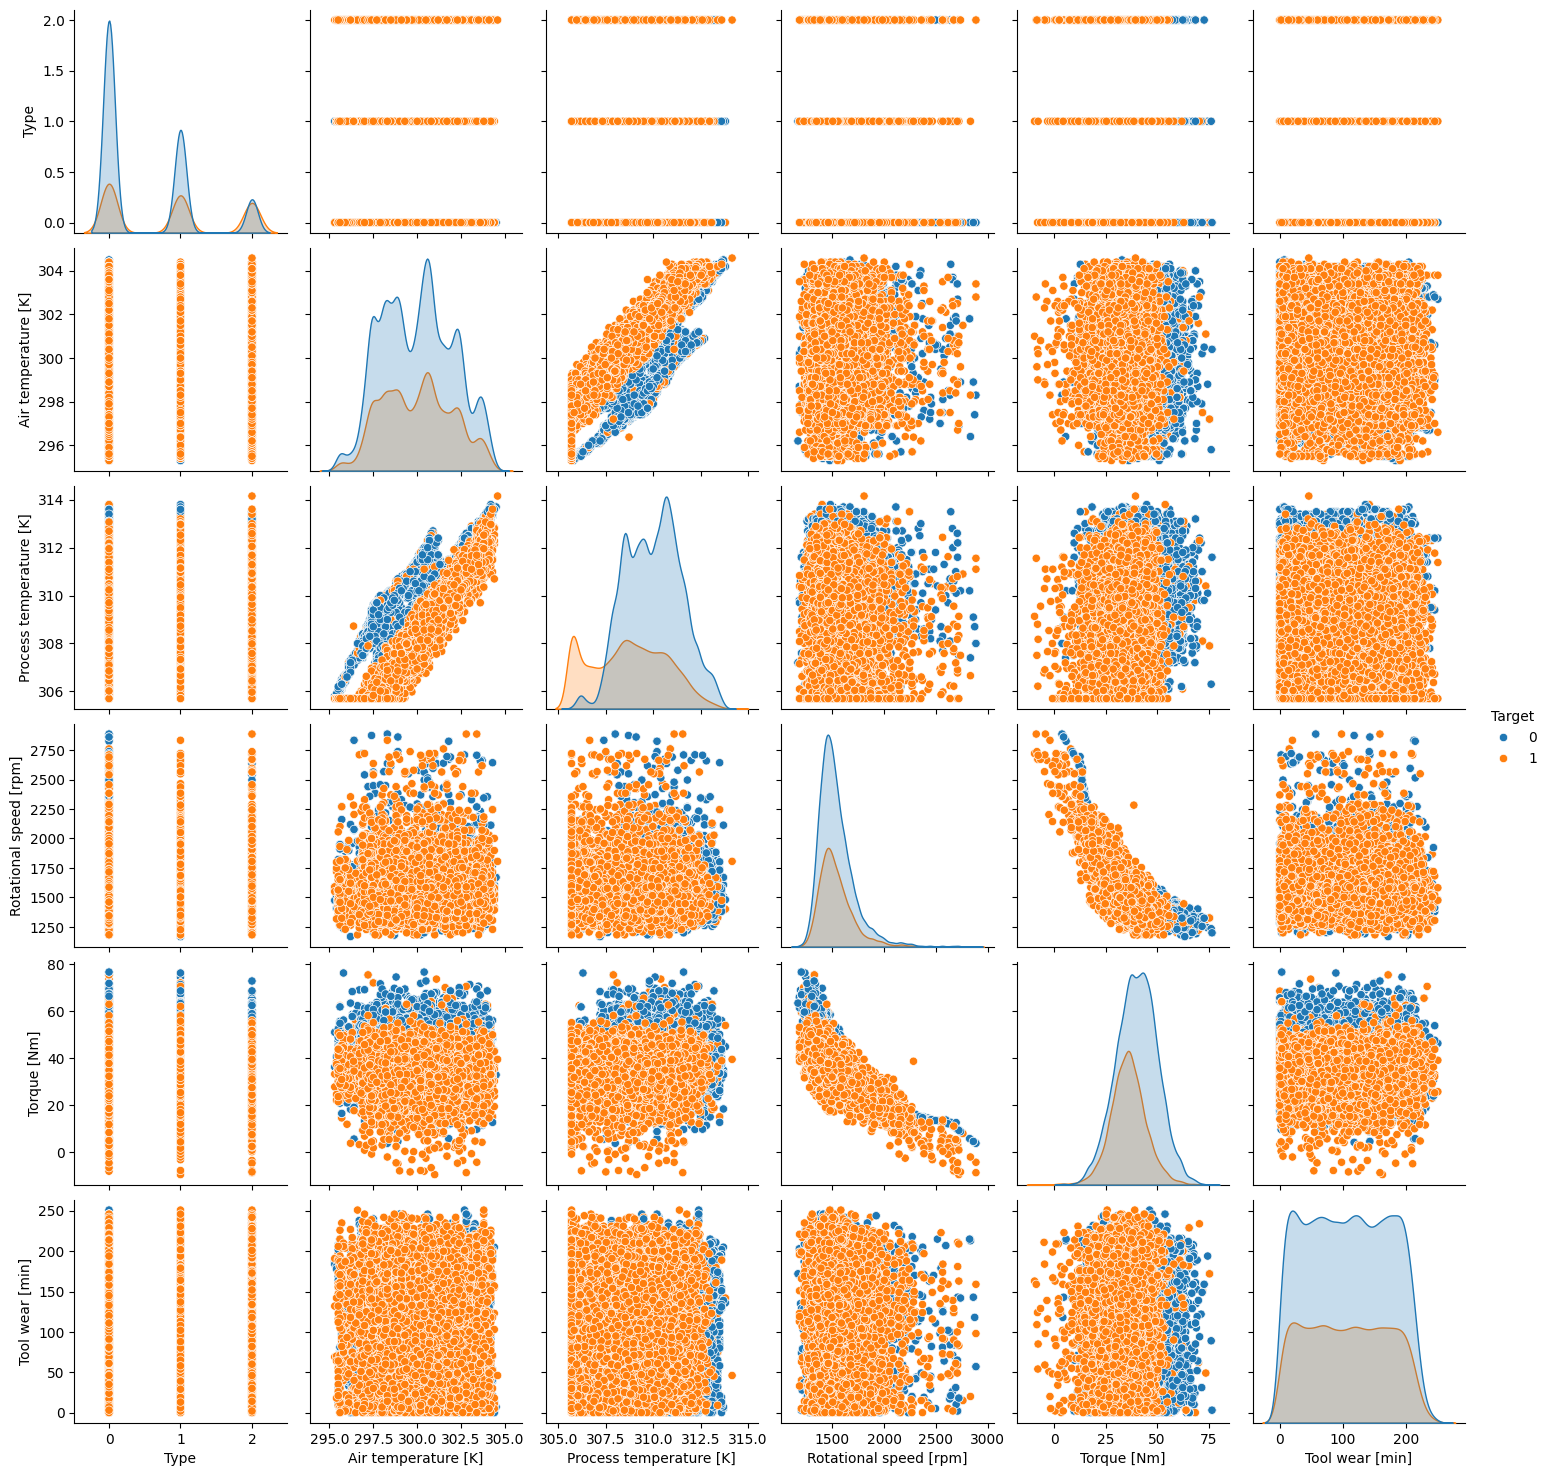

In [13]:
# Correlation between each Features
import seaborn as sns

sns.pairplot(df,hue='Target')

### 7) Insights from significant feature correlation

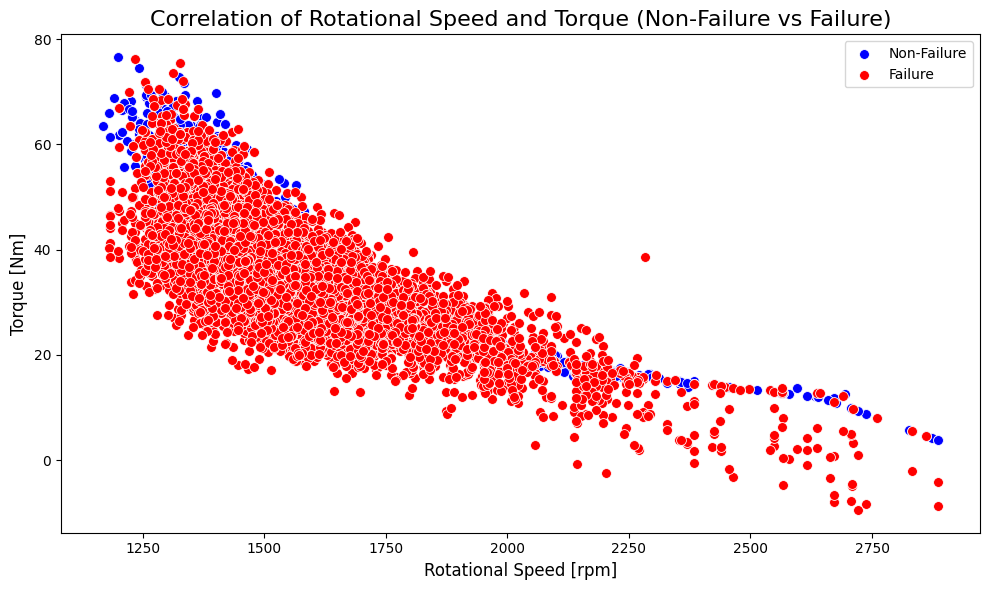

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filter data for Target = 0 (Non-failure)
non_failure_data = df[df['Target'] == 0]

# Filter data for Target = 1 (Failure)
failure_data = df[df['Target'] == 1]

# Plot Non-Failure and Failure in the same visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=non_failure_data,
    x='Rotational speed [rpm]',
    y='Torque [Nm]',
    color='blue',
    label='Non-Failure',
    s=50
)
sns.scatterplot(
    data=failure_data,
    x='Rotational speed [rpm]',
    y='Torque [Nm]',
    color='red',
    label='Failure',
    s=50
)
plt.title('Correlation of Rotational Speed and Torque (Non-Failure vs Failure)', fontsize=16)
plt.xlabel('Rotational Speed [rpm]', fontsize=12)
plt.ylabel('Torque [Nm]', fontsize=12)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


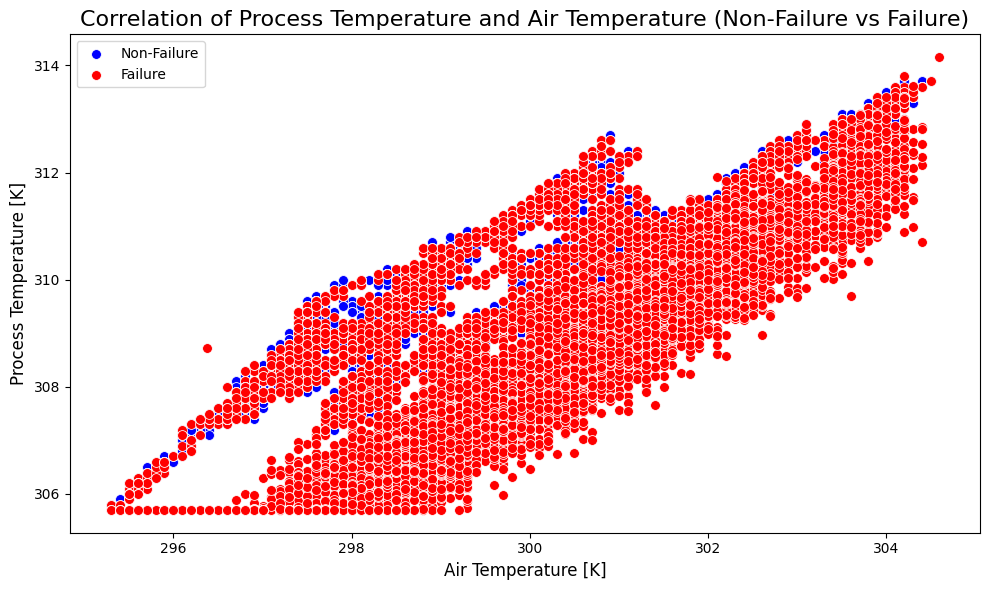

In [15]:
# Filter data for Target = 0 (Non-failure)
non_failure_data = df[df['Target'] == 0]

# Filter data for Target = 1 (Failure)
failure_data = df[df['Target'] == 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=non_failure_data,
    x='Air temperature [K]',
    y='Process temperature [K]',
    color='blue',
    label='Non-Failure',
    s=50
)
sns.scatterplot(
    data=failure_data,
    x='Air temperature [K]',
    y='Process temperature [K]',
    color='red',
    label='Failure',
    s=50
)
plt.title('Correlation of Process Temperature and Air Temperature (Non-Failure vs Failure)', fontsize=16)
plt.xlabel('Air Temperature [K]', fontsize=12)
plt.ylabel('Process Temperature [K]', fontsize=12)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Data Preprocessing

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score


features = ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Target'
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Model Training

### 1) Logistic Regression

Logistic Regression Test Accuracy: 0.8515
Logistic Regression Train Accuracy: 0.8549

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6800
           1       0.87      0.63      0.73      3201

    accuracy                           0.85     10001
   macro avg       0.86      0.79      0.81     10001
weighted avg       0.85      0.85      0.84     10001

ROC-AUC Score (Test Set): 0.8230


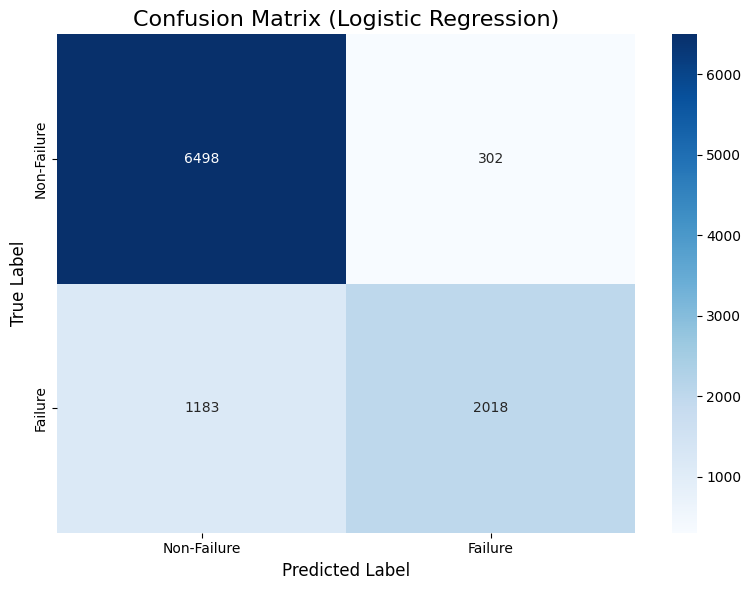

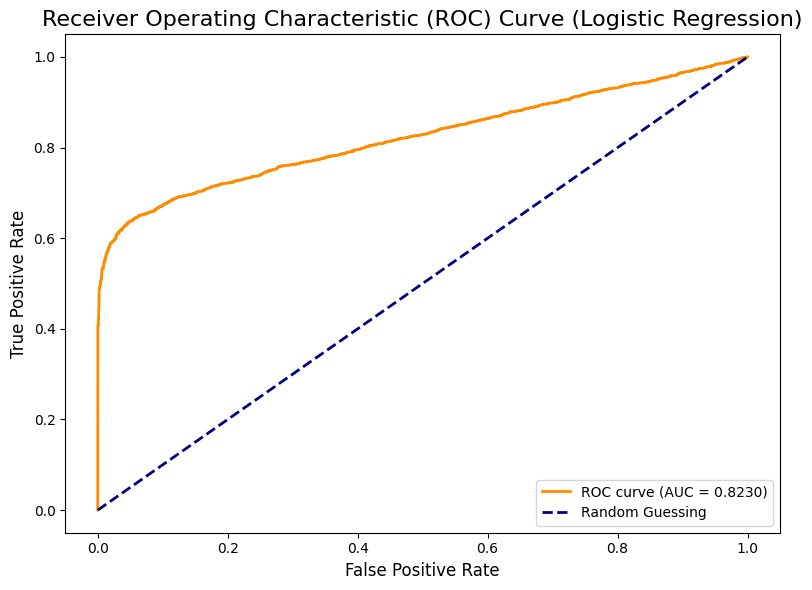

In [17]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the Logistic Regression model on the training data
logreg.fit(X_train, y_train)

# Predict on the test set
y_test_pred = logreg.predict(X_test)

# Predict on the train set
y_train_pred = logreg.predict(X_train)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Logistic Regression Test Accuracy: {test_accuracy:.4f}')

# Calculate train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Logistic Regression Train Accuracy: {train_accuracy:.4f}')

# Print classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Calculate ROC-AUC score for the test set
y_test_prob = logreg.predict_proba(X_test)[:, 1]  # Probability for the positive class
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f"ROC-AUC Score (Test Set): {roc_auc:.4f}")

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Failure", "Failure"], yticklabels=["Non-Failure", "Failure"])
plt.title("Confusion Matrix (Logistic Regression)", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()

# ROC Curve Visualization
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guessing")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve (Logistic Regression)", fontsize=16)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### 2) Random Forest


Random Forest Test Accuracy: 0.8638
Random Forest Train Accuracy: 0.9076

Random Forest Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      6800
           1       0.88      0.66      0.76      3201

    accuracy                           0.86     10001
   macro avg       0.87      0.81      0.83     10001
weighted avg       0.87      0.86      0.86     10001

Random Forest ROC-AUC Score (Test Set): 0.8303


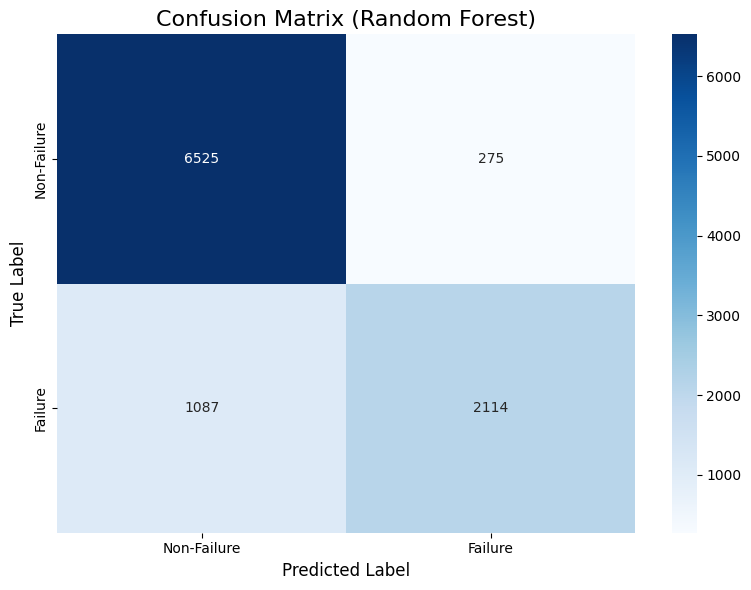

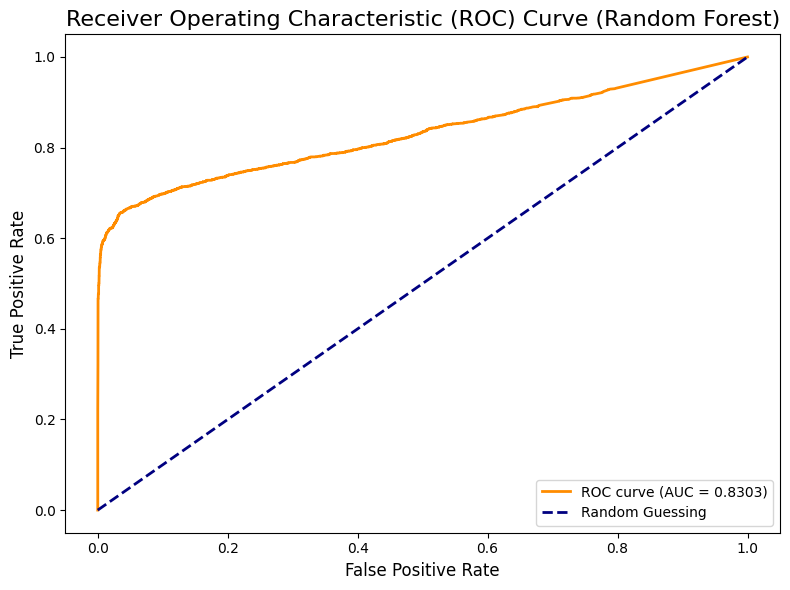

In [18]:
# Initialize Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the training data
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_test = rf.predict(X_test)

# Predict on the train set
y_pred_rf_train = rf.predict(X_train)

# Calculate accuracy for Random Forest
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)

print(f'\nRandom Forest Test Accuracy: {accuracy_rf_test:.4f}')
print(f'Random Forest Train Accuracy: {accuracy_rf_train:.4f}')

# Print classification report for Random Forest (test set)
print("\nRandom Forest Classification Report (Test Set):")
print(classification_report(y_test, y_pred_rf_test))

# Calculate ROC-AUC score for Random Forest
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # Probability for the positive class
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"Random Forest ROC-AUC Score (Test Set): {roc_auc_rf:.4f}")

# Confusion Matrix Visualization
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Failure", "Failure"], yticklabels=["Non-Failure", "Failure"])
plt.title("Confusion Matrix (Random Forest)", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()

# ROC Curve Visualization
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc_rf:.4f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guessing")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve (Random Forest)", fontsize=16)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### 3) K-Nearest Neighbors


K-Nearest Neighbors Test Accuracy: 0.8530
K-Nearest Neighbors Train Accuracy: 0.8790

K-Nearest Neighbors Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      6800
           1       0.91      0.60      0.72      3201

    accuracy                           0.85     10001
   macro avg       0.87      0.79      0.81     10001
weighted avg       0.86      0.85      0.84     10001

KNN ROC-AUC Score (Test Set): 0.8090


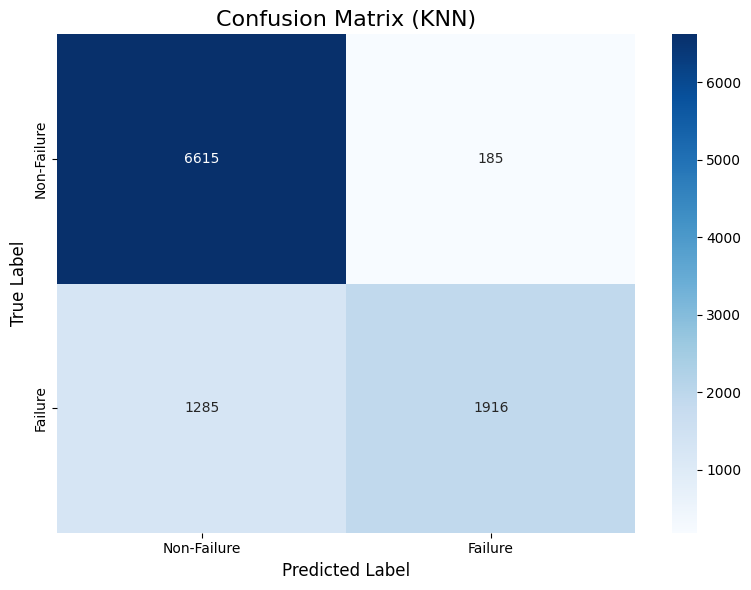

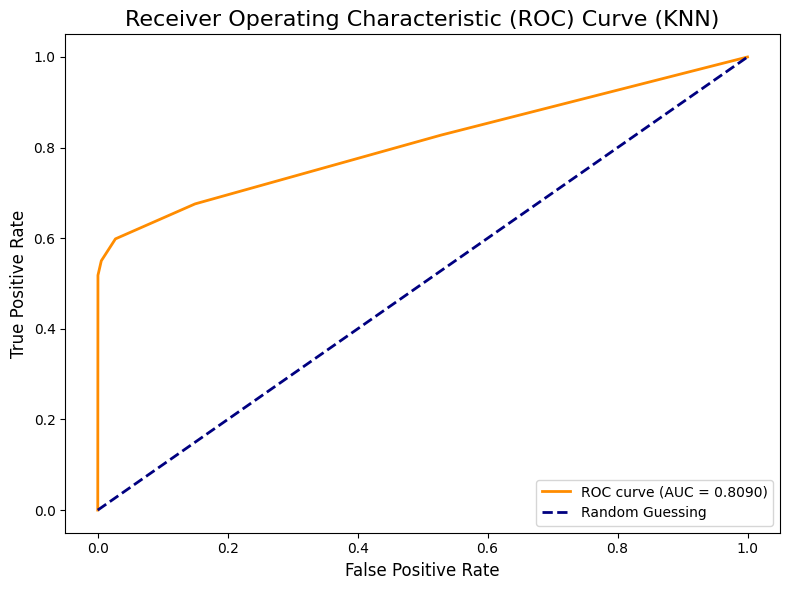

In [19]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model on the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn_test = knn.predict(X_test)

# Predict on the train set
y_pred_knn_train = knn.predict(X_train)

# Calculate accuracy for KNN
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)

print(f'\nK-Nearest Neighbors Test Accuracy: {accuracy_knn_test:.4f}')
print(f'K-Nearest Neighbors Train Accuracy: {accuracy_knn_train:.4f}')

# Print classification report for KNN (test set)
print("\nK-Nearest Neighbors Classification Report (Test Set):")
print(classification_report(y_test, y_pred_knn_test))

# Calculate ROC-AUC score for KNN
y_prob_knn = knn.predict_proba(X_test)[:, 1]  # Probability for the positive class
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
print(f"KNN ROC-AUC Score (Test Set): {roc_auc_knn:.4f}")

# Confusion Matrix Visualization
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Failure", "Failure"], yticklabels=["Non-Failure", "Failure"])
plt.title("Confusion Matrix (KNN)", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()

# ROC Curve Visualization
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc_knn:.4f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guessing")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve (KNN)", fontsize=16)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### 4) Boosting


Boosting Test Accuracy: 0.8737
Boosting Train Accuracy: 0.8767

Boosting Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      6800
           1       0.98      0.62      0.76      3201

    accuracy                           0.87     10001
   macro avg       0.91      0.81      0.84     10001
weighted avg       0.89      0.87      0.86     10001

Boosting ROC-AUC Score (Test Set): 0.8316


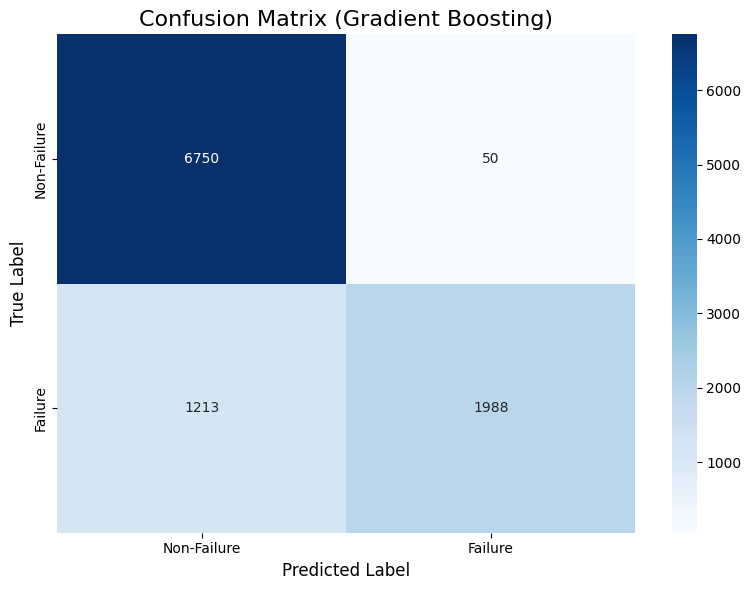

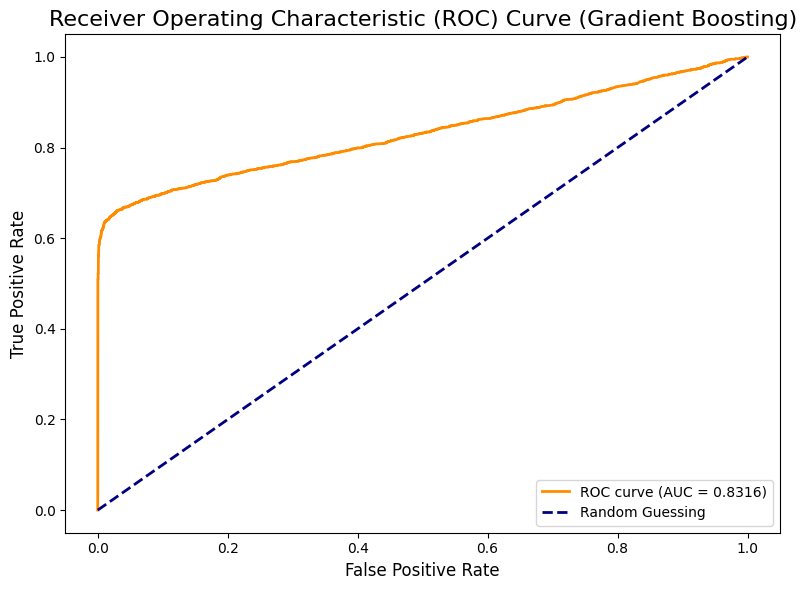

In [20]:
# --- Gradient Boosting ---
boosting = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Fit the Boosting model
boosting.fit(X_train, y_train)

# Predict on the test set
y_pred_boosting = boosting.predict(X_test)

# Predict on the train set
y_pred_boosting_train = boosting.predict(X_train)

# Calculate accuracy for Boosting
accuracy_boosting_test = accuracy_score(y_test, y_pred_boosting)
accuracy_boosting_train = accuracy_score(y_train, y_pred_boosting_train)

print(f'\nBoosting Test Accuracy: {accuracy_boosting_test:.4f}')
print(f'Boosting Train Accuracy: {accuracy_boosting_train:.4f}')

# Print classification report for Boosting (test set)
print("\nBoosting Classification Report (Test Set):")
print(classification_report(y_test, y_pred_boosting))

# Calculate ROC-AUC score for Boosting
y_prob_boosting = boosting.predict_proba(X_test)[:, 1]
roc_auc_boosting = roc_auc_score(y_test, y_prob_boosting)
print(f"Boosting ROC-AUC Score (Test Set): {roc_auc_boosting:.4f}")

# Confusion Matrix Visualization
conf_matrix_boosting = confusion_matrix(y_test, y_pred_boosting)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_boosting, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Failure", "Failure"], yticklabels=["Non-Failure", "Failure"])
plt.title("Confusion Matrix (Gradient Boosting)", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()

# ROC Curve Visualization
fpr_boosting, tpr_boosting, _ = roc_curve(y_test, y_prob_boosting)
roc_auc_boosting = auc(fpr_boosting, tpr_boosting)

plt.figure(figsize=(8, 6))
plt.plot(fpr_boosting, tpr_boosting, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc_boosting:.4f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guessing")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve (Gradient Boosting)", fontsize=16)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## Further Interpretation for Significant Features

### 1) Feature importance for Decision Tree

                   Feature  Importance
1  Process temperature [K]    0.561620
0      Air temperature [K]    0.204269
3              Torque [Nm]    0.083666
2   Rotational speed [rpm]    0.078215
4          Tool wear [min]    0.047446
5                     Type    0.024783


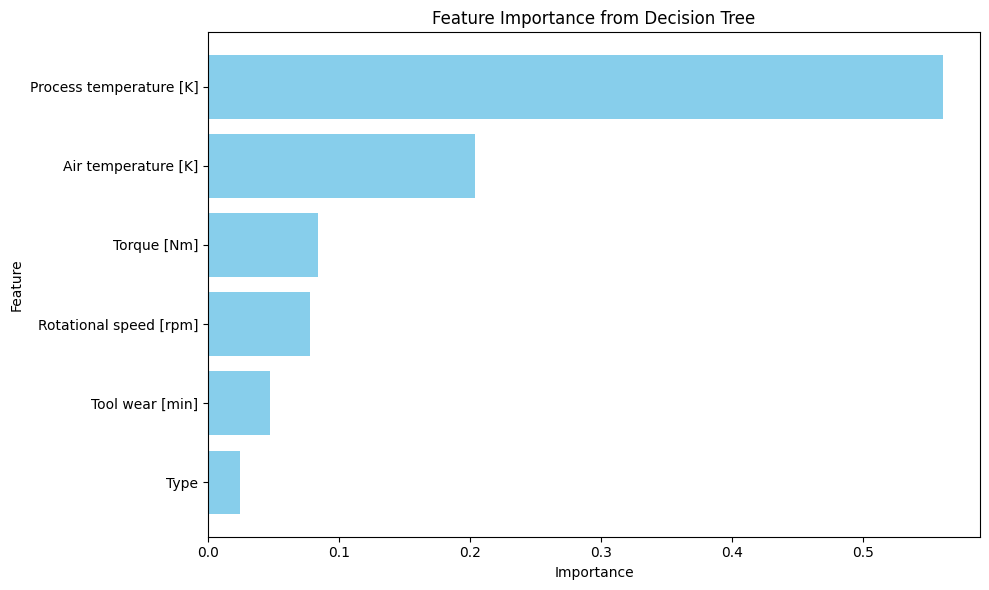

In [22]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


# Define features and target
numerical_columns = [
    "Air temperature [K]",
    "Process temperature [K]",
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]",
    "Type"  # Include encoded 'Type' column
]
target_column = "Target"

# Scale the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_columns])

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(scaled_features, df[target_column])

# Extract feature importances
feature_importances = pd.DataFrame({
    "Feature": numerical_columns,
    "Importance": dt_classifier.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances["Feature"], feature_importances["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Decision Tree")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 2) Feature importance for Logistic Regression Coefficients

                   Feature  Coefficient  Magnitude
1  Process temperature [K]    -2.387236   2.387236
0      Air temperature [K]     1.924904   1.924904
3              Torque [Nm]    -0.915424   0.915424
2   Rotational speed [rpm]    -0.742526   0.742526
5                     Type     0.257988   0.257988
4          Tool wear [min]    -0.023940   0.023940


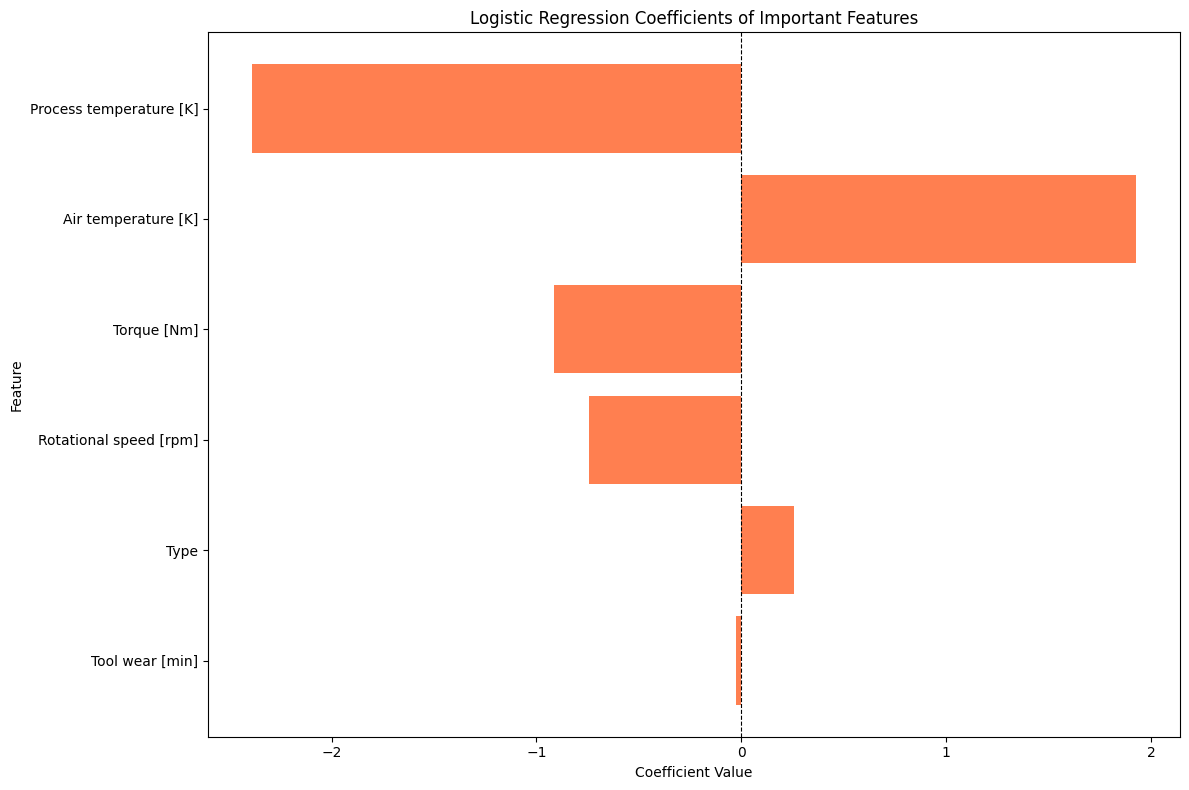

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# Train a logistic regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(scaled_features, df[target_column])

# Extract coefficients and map to feature names
logistic_coefficients = pd.DataFrame({
    "Feature": numerical_columns,
    "Coefficient": logistic_model.coef_[0],
    "Magnitude": abs(logistic_model.coef_[0])
}).sort_values(by="Magnitude", ascending=False)

print(logistic_coefficients)

plt.figure(figsize=(12, 8))
plt.barh(logistic_coefficients["Feature"], logistic_coefficients["Coefficient"], color="coral")
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Logistic Regression Coefficients of Important Features")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
